In [1]:
df <- read.csv('creditcard.csv')

In [2]:
head(df)

Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,-1.3598071,-0.07278117,2.5363467,1.3781552,-0.33832077,0.46238778,0.23959855,0.09869790,0.3637870,...,-0.018306778,0.277837576,-0.11047391,0.06692807,0.1285394,-0.1891148,0.133558377,-0.02105305,149.62,0
0,1.1918571,0.26615071,0.1664801,0.4481541,0.06001765,-0.08236081,-0.07880298,0.08510165,-0.2554251,...,-0.225775248,-0.638671953,0.10128802,-0.33984648,0.1671704,0.1258945,-0.008983099,0.01472417,2.69,0
1,-1.3583541,-1.34016307,1.7732093,0.3797796,-0.50319813,1.80049938,0.79146096,0.24767579,-1.5146543,...,0.247998153,0.771679402,0.90941226,-0.68928096,-0.3276418,-0.1390966,-0.055352794,-0.05975184,378.66,0
1,-0.9662717,-0.18522601,1.7929933,-0.8632913,-0.01030888,1.24720317,0.23760894,0.37743587,-1.3870241,...,-0.108300452,0.005273597,-0.19032052,-1.17557533,0.6473760,-0.2219288,0.062722849,0.06145763,123.50,0
2,-1.1582331,0.87773675,1.5487178,0.4030339,-0.40719338,0.09592146,0.59294075,-0.27053268,0.8177393,...,-0.009430697,0.798278495,-0.13745808,0.14126698,-0.2060096,0.5022922,0.219422230,0.21515315,69.99,0
2,-0.4259659,0.96052304,1.1411093,-0.1682521,0.42098688,-0.02972755,0.47620095,0.26031433,-0.5686714,...,-0.208253515,-0.559824796,-0.02639767,-0.37142658,-0.2327938,0.1059148,0.253844225,0.08108026,3.67,0


In [3]:
str(df)

'data.frame':	284807 obs. of  31 variables:
 $ Time  : num  0 0 1 1 2 2 4 7 7 9 ...
 $ V1    : num  -1.36 1.192 -1.358 -0.966 -1.158 ...
 $ V2    : num  -0.0728 0.2662 -1.3402 -0.1852 0.8777 ...
 $ V3    : num  2.536 0.166 1.773 1.793 1.549 ...
 $ V4    : num  1.378 0.448 0.38 -0.863 0.403 ...
 $ V5    : num  -0.3383 0.06 -0.5032 -0.0103 -0.4072 ...
 $ V6    : num  0.4624 -0.0824 1.8005 1.2472 0.0959 ...
 $ V7    : num  0.2396 -0.0788 0.7915 0.2376 0.5929 ...
 $ V8    : num  0.0987 0.0851 0.2477 0.3774 -0.2705 ...
 $ V9    : num  0.364 -0.255 -1.515 -1.387 0.818 ...
 $ V10   : num  0.0908 -0.167 0.2076 -0.055 0.7531 ...
 $ V11   : num  -0.552 1.613 0.625 -0.226 -0.823 ...
 $ V12   : num  -0.6178 1.0652 0.0661 0.1782 0.5382 ...
 $ V13   : num  -0.991 0.489 0.717 0.508 1.346 ...
 $ V14   : num  -0.311 -0.144 -0.166 -0.288 -1.12 ...
 $ V15   : num  1.468 0.636 2.346 -0.631 0.175 ...
 $ V16   : num  -0.47 0.464 -2.89 -1.06 -0.451 ...
 $ V17   : num  0.208 -0.115 1.11 -0.684 -0.237 ...
 $ V

In [4]:
colnames(df)

[1] "Time"   "V1"     "V2"     "V3"     "V4"     "V5"     "V6"     "V7"    
 [9] "V8"     "V9"     "V10"    "V11"    "V12"    "V13"    "V14"    "V15"   
[17] "V16"    "V17"    "V18"    "V19"    "V20"    "V21"    "V22"    "V23"   
[25] "V24"    "V25"    "V26"    "V27"    "V28"    "Amount" "Class"

In [5]:
library(dplyr)


Attaching package: 'dplyr'

The following objects are masked from 'package:stats':

    filter, lag

The following objects are masked from 'package:base':

    intersect, setdiff, setequal, union



In [6]:
df %>% 
  group_by(Class) %>%
  summarise(no_rows = length(Class))

Class,no_rows
0,284315
1,492


In [13]:
library(caTools)
set.seed(101)

split = sample.split(df$Class, SplitRatio = 0.70)

final.train = subset(df, split == TRUE)
final.test = subset(df, split == FALSE)

In [14]:
table(final.test$Class)


    0     1 
85295   148 

In [15]:
paste0('baseline accuraccy: ',1-148/85443)

[1] "baseline accuraccy: 0.998267851082008"

### Logistic Regression

In [23]:
glm.model <- glm(as.factor(Class) ~ ., data = final.train, family = "binomial")
glm.predict <- predict(glm.model, final.test, type = "response")


Warning message:
"glm.fit: fitted probabilities numerically 0 or 1 occurred"

In [23]:
library(caret)

Loading required package: lattice
Loading required package: ggplot2

Attaching package: 'ggplot2'

The following object is masked from 'package:randomForest':

    margin



In [26]:
confusionMatrix(final.test$Class, as.integer(as.logical(glm.predict > 0.5)),positive = '1')

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 85281    14
         1    55    93
                                         
               Accuracy : 0.9992         
                 95% CI : (0.999, 0.9994)
    No Information Rate : 0.9987         
    P-Value [Acc > NIR] : 5.655e-05      
                                         
                  Kappa : 0.729          
 Mcnemar's Test P-Value : 1.469e-06      
                                         
            Sensitivity : 0.869159       
            Specificity : 0.999355       
         Pos Pred Value : 0.628378       
         Neg Pred Value : 0.999836       
             Prevalence : 0.001252       
         Detection Rate : 0.001088       
   Detection Prevalence : 0.001732       
      Balanced Accuracy : 0.934257       
                                         
       'Positive' Class : 1              
                                         

### Decision Tree

In [29]:
library(rpart)
library(rpart.plot)

In [28]:
tree.model <- rpart(as.factor(Class) ~ ., data = final.train, method = "class", minbucket = 20)


ERROR: Error in prp(tree.model): could not find function "prp"


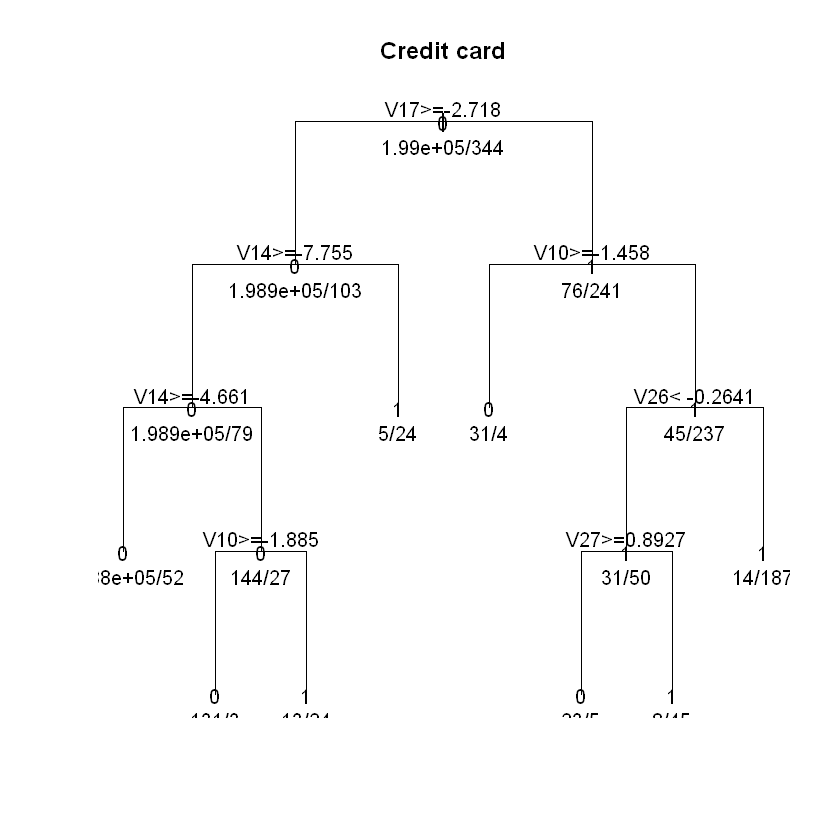

In [31]:
plot(tree.model, uniform=TRUE, main="Credit card")
text(tree.model, use.n=TRUE, all=TRUE)

In [34]:
tree.predict <- predict(tree.model, final.test, type = "class")
confusionMatrix(final.test$Class, tree.predict)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0 85278    17
         1    37   111
                                          
               Accuracy : 0.9994          
                 95% CI : (0.9992, 0.9995)
    No Information Rate : 0.9985          
    P-Value [Acc > NIR] : 1.138e-13       
                                          
                  Kappa : 0.804           
 Mcnemar's Test P-Value : 0.009722        
                                          
            Sensitivity : 0.9996          
            Specificity : 0.8672          
         Pos Pred Value : 0.9998          
         Neg Pred Value : 0.7500          
             Prevalence : 0.9985          
         Detection Rate : 0.9981          
   Detection Prevalence : 0.9983          
      Balanced Accuracy : 0.9334          
                                          
       'Positive' Class : 0               
                                          

### Random Forest 

In [20]:
library(randomForest)

randomForest 4.6-12
Type rfNews() to see new features/changes/bug fixes.

Attaching package: 'randomForest'

The following object is masked from 'package:dplyr':

    combine



set.seed(10)
rf.model <- randomForest(as.factor(Class) ~ ., data = final.train,
                         ntree = 100, nodesize = 20)

rf.predict <- predict(rf.model, final.test)
confusionMatrix(final.test$Class, rf.predict)

### Undersampling 

In [8]:
data.class.0 <- subset(df, df$Class == 0)
data.class.1 <- subset(df, df$Class == 1)
nrow(data.class.0)

[1] 284315

In [9]:
data.class.0 <- data.class.0[1:10000, ]
nrow(data.class.0)

[1] 10000

In [10]:
data <- rbind(data.class.0, data.class.1)
nrow(data)

[1] 10492

### Split data 

In [27]:
library(caTools)
set.seed(101)

split = sample.split(data$Class, SplitRatio = 0.70)

train = subset(data, split == TRUE)
test = subset(data, split == FALSE)

In [28]:
table(train$Class)


   0    1 
7000  344 

In [29]:
table(test$Class)


   0    1 
3000  148 

In [30]:
set.seed(10)
rf.model <- randomForest(as.factor(Class) ~ ., data = train,
                         ntree = 100, nodesize = 20)




In [31]:
rf.predict <- predict(rf.model, test)

In [32]:
confusionMatrix(test$Class, rf.predict)

Confusion Matrix and Statistics

          Reference
Prediction    0    1
         0 2999    1
         1    1  147
                                          
               Accuracy : 0.9994          
                 95% CI : (0.9977, 0.9999)
    No Information Rate : 0.953           
    P-Value [Acc > NIR] : <2e-16          
                                          
                  Kappa : 0.9929          
 Mcnemar's Test P-Value : 1               
                                          
            Sensitivity : 0.9997          
            Specificity : 0.9932          
         Pos Pred Value : 0.9997          
         Neg Pred Value : 0.9932          
             Prevalence : 0.9530          
         Detection Rate : 0.9527          
   Detection Prevalence : 0.9530          
      Balanced Accuracy : 0.9965          
                                          
       'Positive' Class : 0               
                                          

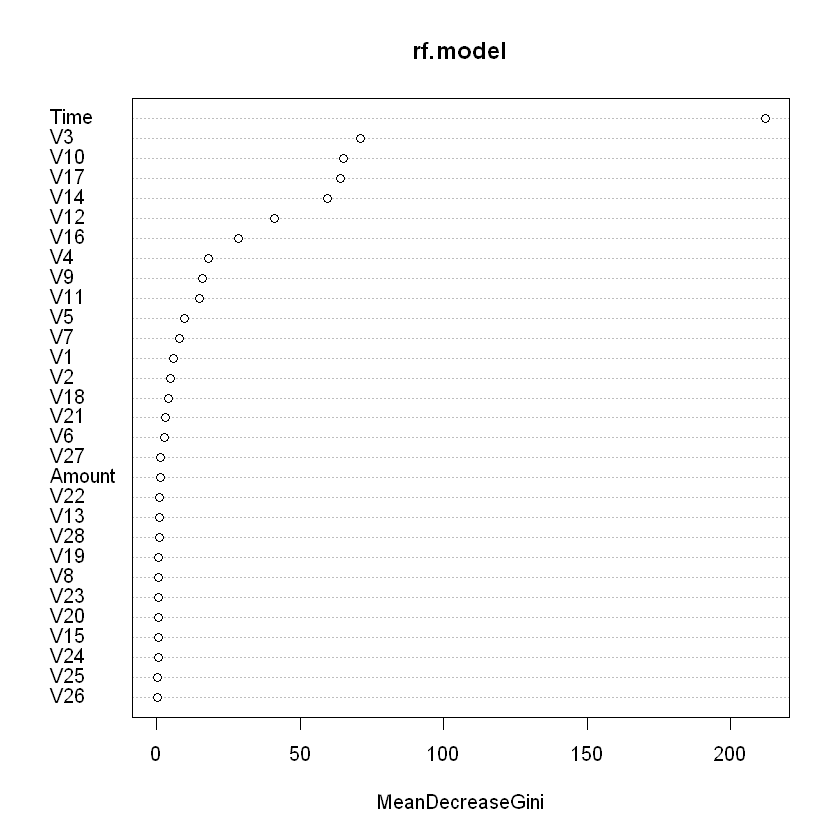

In [36]:
varImpPlot(rf.model)

In [34]:
rf.predict <- predict(rf.model, final.test)

In [35]:
confusionMatrix(final.test$Class, rf.predict)

Confusion Matrix and Statistics

          Reference
Prediction     0     1
         0  3103 82192
         1     1   147
                                          
               Accuracy : 0.038           
                 95% CI : (0.0368, 0.0393)
    No Information Rate : 0.9637          
    P-Value [Acc > NIR] : 1               
                                          
                  Kappa : 1e-04           
 Mcnemar's Test P-Value : <2e-16          
                                          
            Sensitivity : 0.999678        
            Specificity : 0.001785        
         Pos Pred Value : 0.036380        
         Neg Pred Value : 0.993243        
             Prevalence : 0.036328        
         Detection Rate : 0.036317        
   Detection Prevalence : 0.998268        
      Balanced Accuracy : 0.500732        
                                          
       'Positive' Class : 0               
                                          